In [ ]:
import pandas as pd
import numpy as np

In [ ]:
reason_df = pd.read_csv('/content/new_reason - reason18315ff.csv')

In [ ]:
senti_df=pd.read_csv('/content/sentiment_statisticscc1e57a.csv')

In [ ]:
cust_df= pd.read_csv('/content/customers2afd6ea.csv')

In [ ]:
reason_df

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating
...,...,...
66648,7569738090,Mileage Plus
66649,1563273072,Post Flight
66650,8865997781,Upgrade
66651,8019240181,Upgrade


In [ ]:
calls_df= pd.read_csv('/content/callsf0d4f5a.csv')

In [ ]:
final_merged=pd.merge(reason_df,calls_df,on='call_id',how='left')
final_merged


,call_id,primary_call_reason,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,Voluntary Cancel,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,Booking,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,IRROPS,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,Upgrade,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,Seating,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...
...,...,...,...,...,...,...,...,...
66648,7569738090,Mileage Plus,7367304988,783441,8/31/2024 23:51,8/31/2024 23:57,9/1/2024 0:07,\n\nAgent: Thank you for calling United Airlin...
66649,1563273072,Post Flight,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...
66650,8865997781,Upgrade,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...
66651,8019240181,Upgrade,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...


In [ ]:
# Convert the string columns to datetime
final_merged['call_end_datetime'] = pd.to_datetime(final_merged['call_end_datetime'])
final_merged['agent_assigned_datetime'] = pd.to_datetime(final_merged['agent_assigned_datetime'])
final_merged['call_start_datetime'] = pd.to_datetime(final_merged['call_start_datetime'])

# Perform subtraction to create the time difference columns
final_merged['Handle_time'] = final_merged['call_end_datetime'] - final_merged['agent_assigned_datetime']
final_merged['Speed_time'] = final_merged['agent_assigned_datetime'] - final_merged['call_start_datetime']

# Convert the time differences to minutes (total_seconds() returns seconds, we divide by 60)
final_merged['Handle_time_minutes'] = final_merged['Handle_time'].dt.total_seconds() / 60
final_merged['Speed_time_minutes'] = final_merged['Speed_time'].dt.total_seconds() / 60

# Display the resulting DataFrame with time in minutes
print(final_merged[['Handle_time_minutes', 'Speed_time_minutes']])

       Handle_time_minutes  Speed_time_minutes
0                     31.0                 7.0
1                     12.0                 3.0
2                     19.0                 8.0
3                      7.0                 5.0
4                      9.0                10.0
...                    ...                 ...
66648                 10.0                 6.0
66649                 28.0                 9.0
66650                  8.0                 3.0
66651                  6.0                 6.0
66652                  3.0                10.0

[66653 rows x 2 columns]


In [ ]:
solvable=['Baggage' ,'Booking' , 'Digital Support' ,'Disability' , 'other topics' , 'Traveller Updates']

In [ ]:
r_df=pd.read_csv('/content/reason18315ff.csv')

In [ ]:
senti_df

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...
71805,1563273072,413148,calm,calm,0.05,0.34
71806,8865997781,980156,calm,frustrated,0.03,0.22
71807,8019240181,616988,calm,polite,0.05,0.42
71808,8332067080,161354,neutral,polite,-0.07,0.13


In [ ]:
merged=pd.merge(reason_df,senti_df,on='call_id',how='left')
merged

,call_id,primary_call_reason,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,Voluntary Cancel,963118,neutral,angry,-0.04,0.39
1,1122072124,Booking,519057,calm,neutral,0.02,0.35
2,6834291559,IRROPS,158319,neutral,polite,-0.13,0.32
3,2266439882,Upgrade,488324,neutral,frustrated,-0.20,0.20
4,1211603231,Seating,721730,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...,...
66648,7569738090,Mileage Plus,783441,neutral,frustrated,-0.19,0.51
66649,1563273072,Post Flight,413148,calm,calm,0.05,0.34
66650,8865997781,Upgrade,980156,calm,frustrated,0.03,0.22
66651,8019240181,Upgrade,616988,calm,polite,0.05,0.42


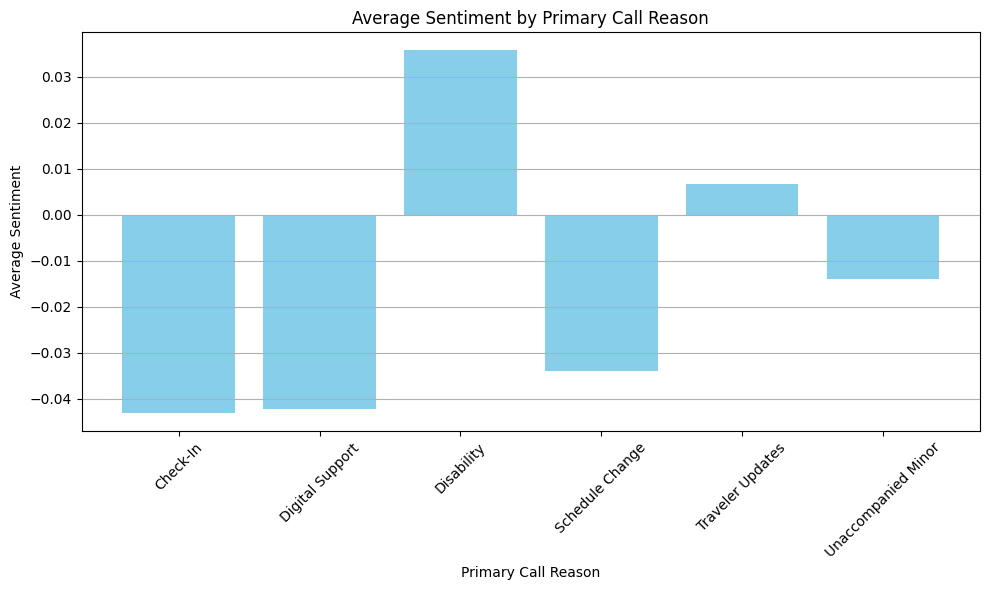

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Filter the DataFrame to include only specific call reasons
solvable_reasons = ['Check-In', 'Digital Support', 'Disability', 'Traveler Updates' ,'Schedule Change']
filtered_df = merged[merged['primary_call_reason'].isin(solvable_reasons)]

# Group by 'primary_call_reason' and calculate the mean of 'average_sentiment'
grouped_df = filtered_df.groupby('primary_call_reason', as_index=False)['average_sentiment'].mean()

# Plotting a bar graph for average_sentiment per primary_call_reason
plt.figure(figsize=(10, 6))
plt.bar(grouped_df['primary_call_reason'], grouped_df['average_sentiment'], color='skyblue')
plt.title('Average Sentiment by Primary Call Reason')
plt.xlabel('Primary Call Reason')
plt.ylabel('Average Sentiment')

# Display the plot with rotated x-axis labels for readability
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

In [ ]:
# currently only two are self solvable [Disablity , Traveler Updates]

<ipython-input-34-03260d895b21>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


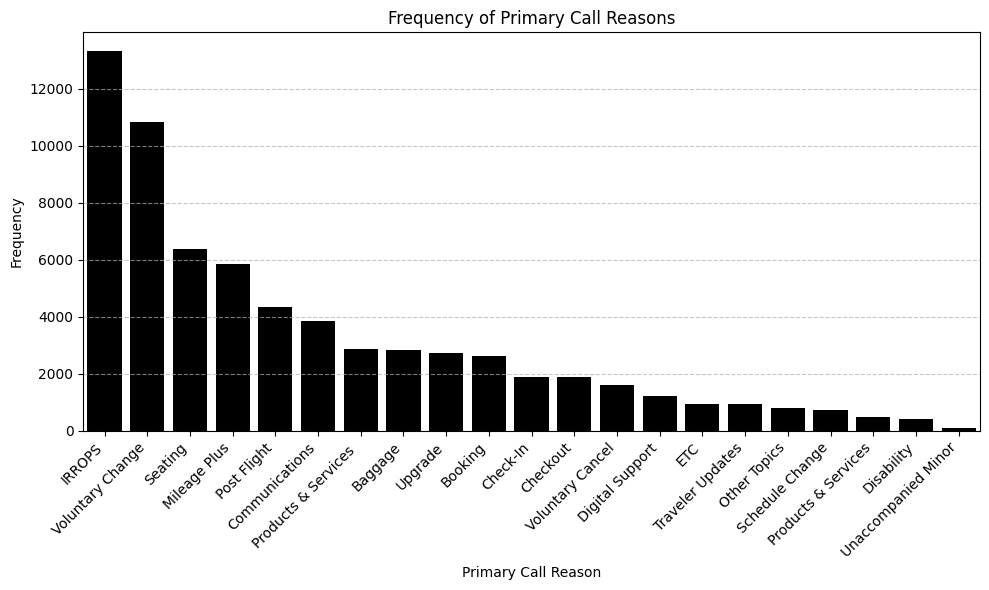

In [ ]:
import seaborn as sns
frequency_counts = reason_df['primary_call_reason'].value_counts()
frequency_counts = reason_df['primary_call_reason'].value_counts().reset_index()
frequency_counts.columns = ['primary_call_reason', 'frequency']
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=frequency_counts, x='primary_call_reason', y='frequency', color='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Frequency of Primary Call Reasons')
plt.xlabel('Primary Call Reason')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
calls_df

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...
...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...
71806,8865997781,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...
71807,8019240181,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...
71808,8332067080,8095620266,161354,8/31/2024 23:53,8/31/2024 23:59,9/1/2024 0:03,\n\nAgent: Thank you for calling United Airlin...
